In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Add this import

In [2]:
#import data
df = pd.read_csv("Homicides_Open_Data.csv")
print(df.head())


              X             Y  OBJECTID EVENT_UNIQUE_ID  \
0 -8.837972e+06  5.416827e+06         1   GO-2004111878   
1 -8.820276e+06  5.431728e+06         2   GO-2004125755   
2 -8.817271e+06  5.436217e+06         3   GO-2004136086   
3 -8.842597e+06  5.414587e+06         4   GO-2004148623   
4 -8.816934e+06  5.438174e+06         5   GO-2004148619   

                 OCC_DATE  OCC_YEAR OCC_MONTH  OCC_DAY   OCC_DOW  OCC_DOY  \
0  2004/01/03 05:00:00+00      2004   January        3  Saturday        3   
1  2004/01/08 05:00:00+00      2004   January        8  Thursday        8   
2  2004/01/08 05:00:00+00      2004   January        8  Thursday        8   
3  2004/01/25 05:00:00+00      2004   January       25    Sunday       25   
4  2004/01/25 05:00:00+00      2004   January       25    Sunday       25   

  DIVISION HOMICIDE_TYPE HOOD_158         NEIGHBOURHOOD_158 HOOD_140  \
0      D53         Other       98       Rosedale-Moore Park       98   
1      D42      Shooting      142     

In [3]:
# Drop the 'EVENT_UNIQUE_ID' column
df = df.drop(columns=['EVENT_UNIQUE_ID'])

# Convert 'OCC_MONTH' to numeric
df['OCC_MONTH'] = pd.to_numeric(df['OCC_MONTH'], errors='coerce')

# Derive features like the season or trends over time
df['Season'] = pd.cut(df['OCC_MONTH'], bins=[0, 3, 6, 9, 12], labels=['Spring', 'Summer', 'Fall', 'Winter'])

# Drop the original OCC_YEAR column
df = df.drop(columns=['OCC_YEAR'])

# Convert 'OCC_DATE' to datetime
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])

# Extract hour and minute features from 'OCC_DATE'
df['Hour'] = df['OCC_DATE'].dt.hour
df['Minute'] = df['OCC_DATE'].dt.minute

# Create features like the day of the week or holidays
df['DayOfWeek'] = df['OCC_DATE'].dt.day_name()

# Drop the original OCC_MONTH, OCC_DAY, and OCC_DATE columns
df = df.drop(columns=['OCC_MONTH', 'OCC_DAY', 'OCC_DATE'])

# Encode the categorical variable DIVISION
df = pd.get_dummies(df, columns=['DIVISION'], drop_first=True)

# Use label encoding for the categorical variables HOOD_158 and NEIGHBOURHOOD_158
label_encoder = LabelEncoder()
df['HOOD_158'] = label_encoder.fit_transform(df['HOOD_158'])
df['NEIGHBOURHOOD_158'] = label_encoder.fit_transform(df['NEIGHBOURHOOD_158'])

# Display the modified DataFrame
print(df.head())


              X             Y  OBJECTID   OCC_DOW  OCC_DOY HOMICIDE_TYPE  \
0 -8.837972e+06  5.416827e+06         1  Saturday        3         Other   
1 -8.820276e+06  5.431728e+06         2  Thursday        8      Shooting   
2 -8.817271e+06  5.436217e+06         3  Thursday        8      Shooting   
3 -8.842597e+06  5.414587e+06         4    Sunday       25      Shooting   
4 -8.816934e+06  5.438174e+06         5    Sunday       25      Shooting   

   HOOD_158  NEIGHBOURHOOD_158 HOOD_140  \
0       150                113       98   
1        39                143      137   
2        43                 80      132   
3        69                 67       93   
4        41                 87      131   

                          NEIGHBOURHOOD_140  ...  DIVISION_D32  DIVISION_D33  \
0                  Rosedale-Moore Park (98)  ...             0             0   
1                              Woburn (137)  ...             0             0   
2                             Malvern (132) 

In [4]:
# Define features (X) and target variable (y)
X = df.drop(columns=['HOMICIDE_TYPE'])
y = df['HOMICIDE_TYPE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1100, 31)
X_test shape: (276, 31)
y_train shape: (1100,)
y_test shape: (276,)


In [6]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Display the shapes of the encoded training and testing sets
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)


X_train_encoded shape: (1100, 305)
X_test_encoded shape: (276, 253)


In [7]:
# Align the training and testing sets to have the same columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Display the shapes of the aligned training and testing sets
print("X_train_encoded shape (after alignment):", X_train_encoded.shape)
print("X_test_encoded shape (after alignment):", X_test_encoded.shape)


X_train_encoded shape (after alignment): (1100, 311)
X_test_encoded shape (after alignment): (276, 311)


In [8]:
# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train_encoded, y_train)

# Display a message indicating that the model has been trained
print("Decision Tree model trained successfully!")


Decision Tree model trained successfully!


In [9]:
# Make predictions on the test set
predictions = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Other evaluation metrics (if needed)
# e.g., classification_report, confusion_matrix
# print(classification_report(y_test, predictions))
# print(confusion_matrix(y_test, predictions))


Accuracy: 0.5181159420289855


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

       Other       0.42      0.30      0.35        84
    Shooting       0.62      0.71      0.66       135
    Stabbing       0.35      0.39      0.37        57

    accuracy                           0.52       276
   macro avg       0.46      0.46      0.46       276
weighted avg       0.51      0.52      0.51       276



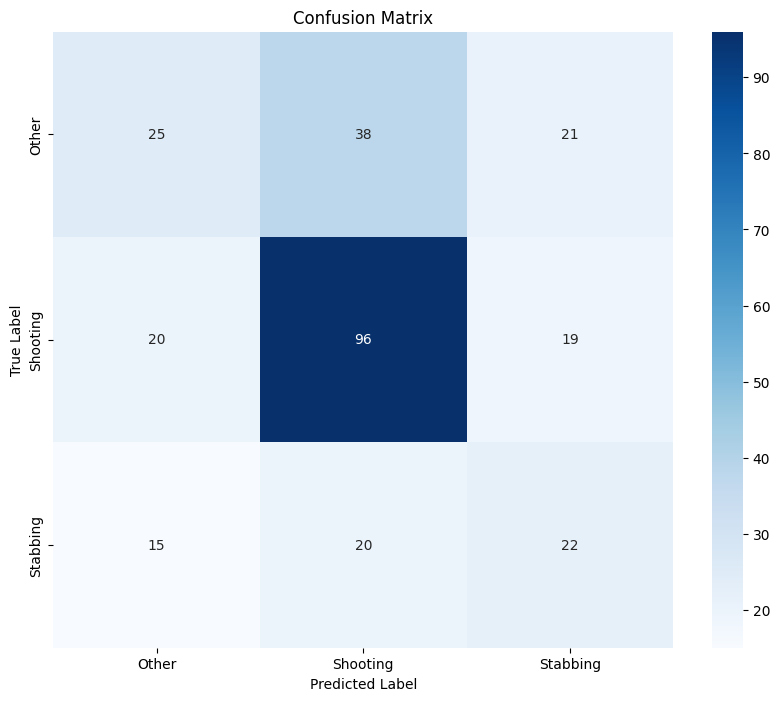

In [13]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()